# Did Lovecraft wrote 'The Inevitable Conflict'?

In December 1930, Amazing Stories published the first part of a story called [The Inevitable Conflict](http://www.entr0py.org/lovecraft/conflict.htm). The next month (in 1931) was published the second part.

Many fans of the works of H. P. Lovecraft believe "The Inevitable Conflict" to be one of his works, as the author was someone called of P. H. Lovering.

This code try to dispel that idea and show how to separate text works of different authors using NLP.

This work is based on the article [Did Lovecraft write The Inevitable Conflict?](http://www.gordonswebsite.net/hp-lovecraft/Did%20Lovecraft%20write%20The%20Inevitable%20Conflict%20by%20W_%20E_%20Johns.htm) written by W. E. Johns

In [48]:
from bs4 import BeautifulSoup
import math
import nltk
import re
import requests
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

## Read the texts

Unclear rights for "The Inevitable Conflict" force me to don't store in the repository and get it from a site. If this doesn't work, feel free to modify this code to make it more fault-tolerant.

In [4]:
inevitable_conflict_url = "http://www.entr0py.org/lovecraft/conflict.htm"
inevitable_conflict_response = requests.get(inevitable_conflict_url) 

inevitable_conflict_soup = BeautifulSoup(inevitable_conflict_response.content, 'html.parser')

raw_inevitable_conflict_text = inevitable_conflict_soup.get_text()

In [5]:
# Delete header and other ugly javascript code
inevitable_conflict_text = raw_inevitable_conflict_text[213:-983]

path = "/tmp/inevitable_conflict.txt"
with open(path, "w") as f:
    f.write(inevitable_conflict_text)
    
inevitable_conflict = nltk.corpus.PlaintextCorpusReader("/tmp", "inevitable_conflict.txt")

Lovecraft is already in the public domain so we have no problem loading a local corpus copy

In [6]:
lovecraft = nltk.corpus.PlaintextCorpusReader("lovecraft", ".*")

## Compare suffixes distributions

In [7]:

def get_suffix_fd(text):
    suffix_fdist = nltk.FreqDist()
    for word in text.words():
        word = word.lower()
        suffix_fdist[word[-1:]] += 1
        suffix_fdist[word[-2:]] += 1
        suffix_fdist[word[-3:]] += 1
    return suffix_fdist

lovecraft_suffix_fd = get_suffix_fd(lovecraft)
inevitable_conflict_suffix_fd = get_suffix_fd(inevitable_conflict)


In [8]:
number_of_suffixes = 20

In [12]:
most_common_lovecraft_suffixes_fd = lovecraft_suffix_fd.most_common(number_of_suffixes)
most_common_lovecraft_suffixes, most_common_lovecraft_suffixes_count = list(zip(*most_common_lovecraft_suffixes_fd))
most_common_lovecraft_suffixes_freq = list(map(lambda count: count/lovecraft_suffix_fd.N(), most_common_lovecraft_suffixes_count))

In [13]:
most_common_inevitable_conflict_suffixes_fd = inevitable_conflict_suffix_fd.most_common(number_of_suffixes)
most_common_inevitable_conflict_suffixes, most_common_inevitable_conflict_suffixes_count = list(zip(*most_common_inevitable_conflict_suffixes_fd))
most_common_inevitable_conflict_suffixes_freq = list(map(lambda count: count/inevitable_conflict_suffix_fd.N(), most_common_inevitable_conflict_suffixes_count))

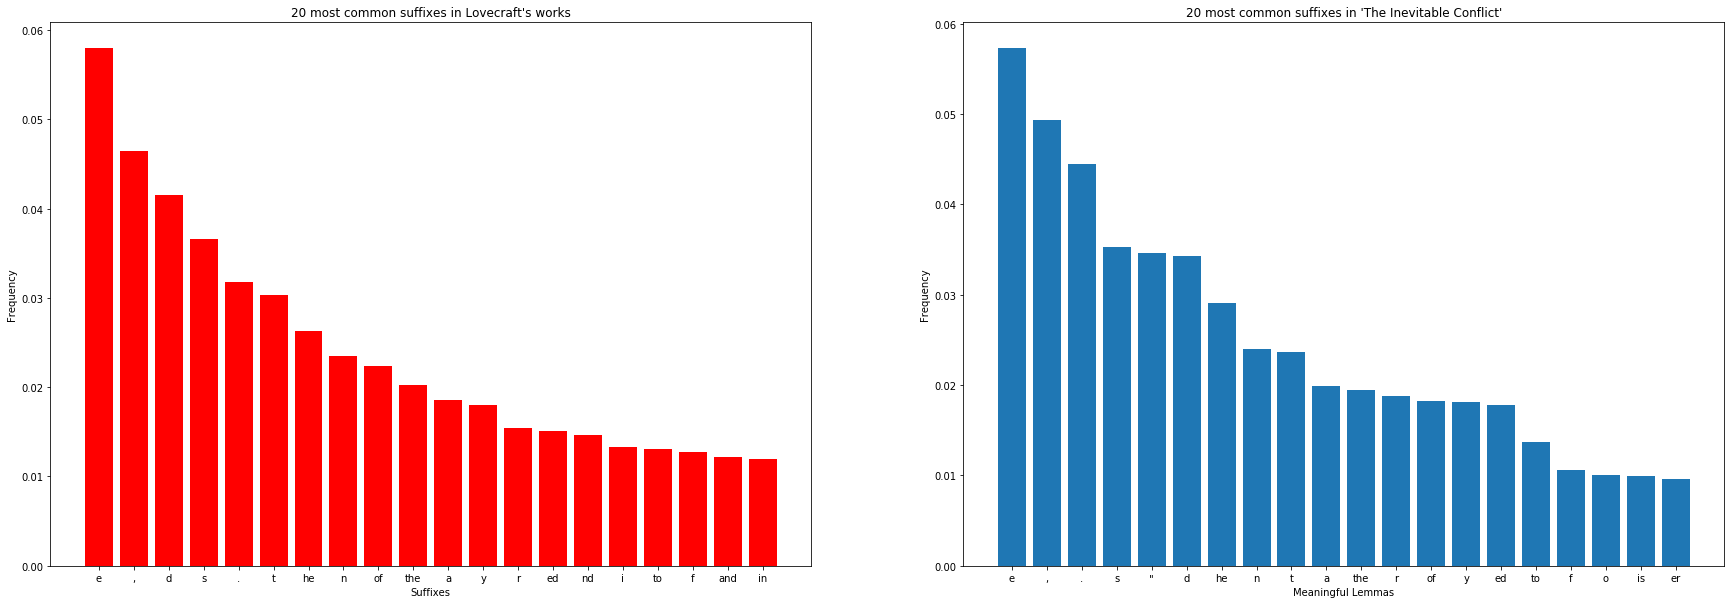

In [14]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

ax[0].bar(np.arange(number_of_suffixes), most_common_lovecraft_suffixes_freq, color="r")
ax[0].set_title("{} most common suffixes in Lovecraft's works".format(number_of_suffixes))
ax[0].set_xticks(np.arange(number_of_suffixes))
ax[0].set_xticklabels(most_common_lovecraft_suffixes)
ax[0].set_xlabel("Suffixes")
ax[0].set_ylabel("Frequency")

ax[1].bar(np.arange(number_of_suffixes), most_common_inevitable_conflict_suffixes_freq)
ax[1].set_title("{} most common suffixes in 'The Inevitable Conflict'".format(number_of_suffixes))
ax[1].set_xticks(np.arange(number_of_suffixes))
ax[1].set_xticklabels(most_common_inevitable_conflict_suffixes)
ax[1].set_xlabel("Suffixes")
ax[1].set_ylabel("Frequency")

plt.show()

## Compare phrase distributions

In [22]:
def get_sentences_by_type(corpus):
    sentences_by_type = nltk.FreqDist()
    for tokenized_sentence in corpus.sents():
        sentence_with_tagged_words = nltk.pos_tag(tokenized_sentence)
        sentence_tags = list(zip(*sentence_with_tagged_words))[1]
        sentence_type_id = "-".join(sentence_tags)
        sentences_by_type[sentence_type_id] += 1
    return sentences_by_type

In [26]:
lovecraft_sentences_fd = get_sentences_by_type(lovecraft)
inevitable_conflict_sentences_fd = get_sentences_by_type(inevitable_conflict)

In [41]:
number_of_sentence_types = 10
lovecraft_sentences_by_type = lovecraft_sentences_fd.most_common(number_of_sentence_types)
inevitable_conflict_sentences_by_type = inevitable_conflict_sentences_fd.most_common(number_of_sentence_types)

In [42]:
most_common_lovecraft_sentence_types = [sentence_type for sentence_type, occurrences in lovecraft_sentences_by_type]
most_common_lovecraft_sentence_types_freq = [occurrences/lovecraft_sentences_fd.N() for sentence_type, occurrences in lovecraft_sentences_by_type]

most_common_inevitable_conflict_sentence_types = [sentence_type for sentence_type, occurrences in inevitable_conflict_sentences_by_type]
most_common_inevitable_conflict_sentence_types_freq = [occurrences/lovecraft_sentences_fd.N() for sentence_type, occurrences in inevitable_conflict_sentences_by_type]

In [45]:
print("Most common Lovecraft sentence types: {}".format(most_common_lovecraft_sentence_types))
print("Most common Inevitable conflict sentence types: {}".format(most_common_inevitable_conflict_sentence_types))

Most common Lovecraft sentence types: ['NN', 'NNP-.', 'NN-.', 'CD', 'NNP-:-NN-.', 'DT-NNP-NNP', 'DT-NNP', 'PRP-.', 'PRP', 'DT-NNP-NNP-NNP-NNP']
Most common Inevitable conflict sentence types: ['PRP-VBD-.', 'JJ-NNP-NN', 'PRP-VBD-,-RB-.', 'PRP-VBD-RB-.', 'JJ-NNP-.', 'NNP-VBD-.', 'NNP-VBD-,-RB-.', 'VBN-NNP-.', 'NN-.', 'NNP-VBD-RB-.']


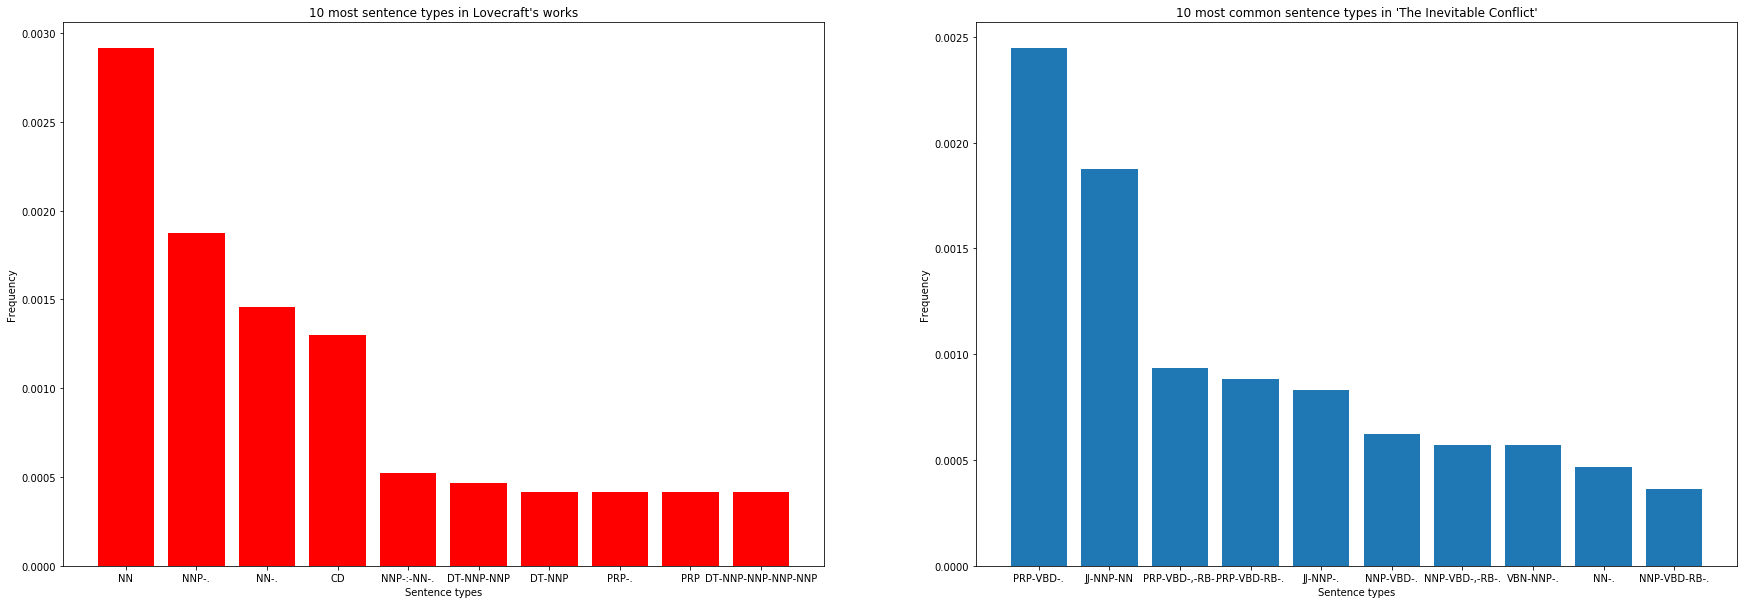

In [44]:
fig, ax = plt.subplots(1,2, figsize=(30,10))

ax[0].bar(np.arange(number_of_sentence_types), most_common_lovecraft_sentence_types_freq, color="r")
ax[0].set_title("{} most sentence types in Lovecraft's works".format(number_of_sentence_types))
ax[0].set_xticks(np.arange(number_of_sentence_types))
ax[0].set_xticklabels(most_common_lovecraft_sentence_types)
ax[0].set_xlabel("Sentence types")
ax[0].set_ylabel("Frequency")

ax[1].bar(np.arange(number_of_sentence_types), most_common_inevitable_conflict_sentence_types_freq)
ax[1].set_title("{} most common sentence types in 'The Inevitable Conflict'".format(number_of_sentence_types))
ax[1].set_xticks(np.arange(number_of_sentence_types))
ax[1].set_xticklabels(most_common_inevitable_conflict_sentence_types)
ax[1].set_xlabel("Sentence types")
ax[1].set_ylabel("Frequency")

plt.show()

## Word entropy

In [53]:
def get_word_fd(words):
    fd = nltk.FreqDist()
    for word in words:
        fd[word] += 1
    return fd

lovecraft_word_fd = get_word_fd([word.lower() for word in lovecraft.words()])
inevitable_conflict_word_fd = get_word_fd([word.lower() for word in inevitable_conflict.words()])

In [54]:
def get_entropy(fd):
    probabilities = [fd.freq(word) for word in fd]
    return -sum(probability * math.log(probability, 2) for probability in probabilities)

lovecraft_entropy = get_entropy(lovecraft_word_fd)
inevitable_conflict_entropy = get_entropy(inevitable_conflict_word_fd)

print("Lovecraft's corpus entropy: {}".format(lovecraft_entropy))
print("Inevitable Conflict corpus entropy: {}".format(inevitable_conflict_entropy))

Lovecraft corpus entropy: 9.757192442034519
Inevitable corpus entropy: 9.122404236048238


Uhm, their word entropy is similar... We have to go deepe

## Average sentence number of words

In [57]:
lovecraft_sentence_lengths = list(map(lambda sentence: len(sentence), lovecraft.sents()))
inevitable_conflict_sentence_lengths = list(map(lambda sentence: len(sentence), inevitable_conflict.sents()))

In [60]:
lovecraft_sentence_length_mean = np.mean(lovecraft_sentence_lengths)
inevitable_conflict_sentence_length_mean = np.mean(inevitable_conflict_sentence_lengths)

print("Lovecraft's sentence length (in words): mean={} std_dev={}".format(np.mean(lovecraft_sentence_lengths), np.std(lovecraft_sentence_lengths)))
print("Inevitable Conflict sentence length (in words): mean={} std_dev={}".format(np.mean(inevitable_conflict_sentence_lengths), np.std(inevitable_conflict_sentence_lengths)))

Lovecraft's sentence length (in words): mean=29.869827720814033 std_dev=16.351054053907408
Inevitable Conflict sentence length (in words): mean=15.14188590008868 std_dev=10.197515749012695
